In [1]:
## This notebook is based on the youtube channel https://www.youtube.com/watch?v=tPYj3fFJGjk&t=71s

In [3]:
## Core machine learning algorithms

In [2]:
import tensorflow as tf

(0.0, 6.0, 0.0, 20.0)

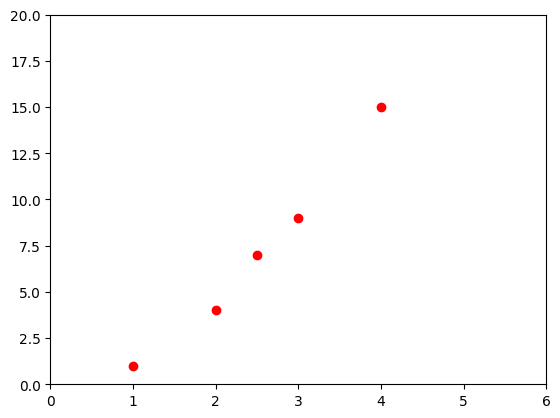

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])        # Specifies the axis values

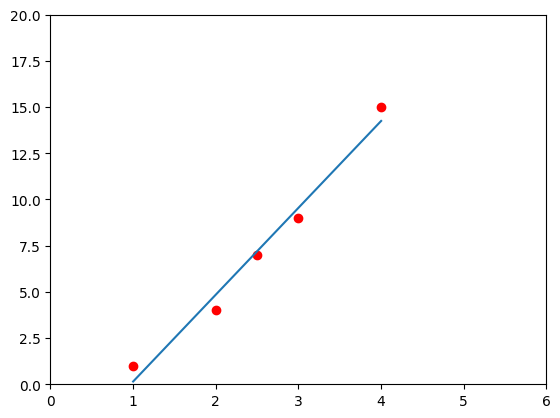

In [24]:
# Line of Best Fit
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, deg=1))(np.unique(x)))  # important use of numpy remember it
plt.show()

## Imports

In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

## Data

In [29]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')             # important 
y_eval = dfeval.pop('survived')

In [30]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [32]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [33]:
dftrain.shape

(627, 9)

In [34]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [35]:
## Lets generate few graphs of data

<Axes: >

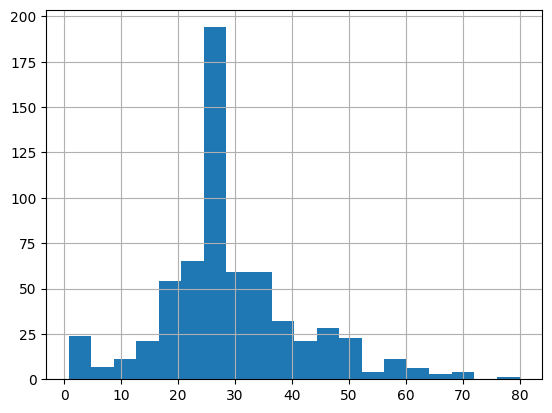

In [39]:
dftrain.age.hist(bins=20)

Text(0.5, 0, 'Count')

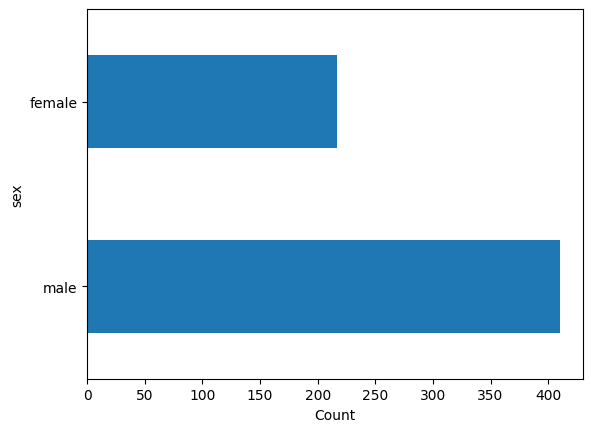

In [49]:
dftrain.sex.value_counts().plot(kind='barh')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

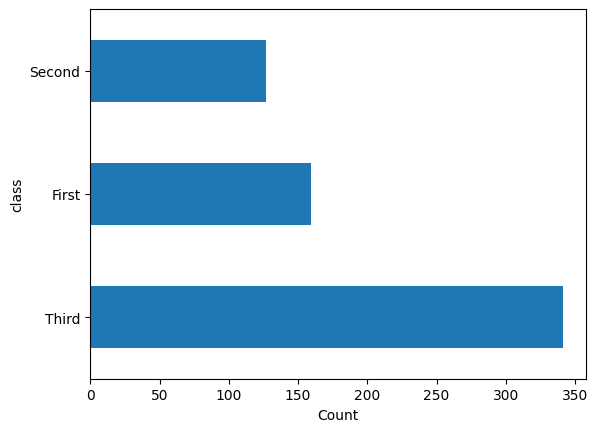

In [50]:
dftrain['class'].value_counts().plot(kind='barh')
plt.xlabel('Count')

Text(0.5, 0, '% survive')

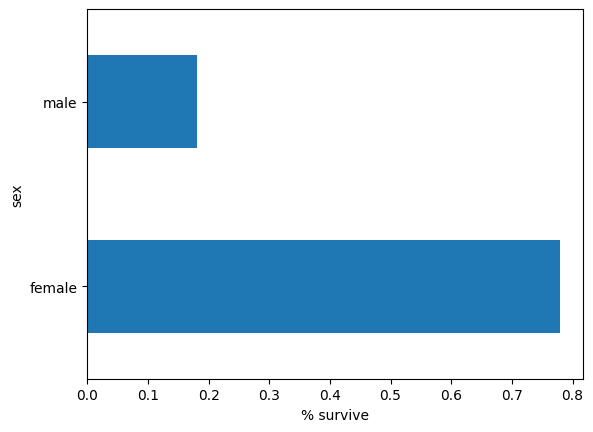

In [51]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns[1].key)

n_siblings_spouses


In [62]:
vocabulary = dftrain['sex'].unique()
tf.feature_column.categorical_column_with_vocabulary_list('sex', vocabulary)

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

## make input for tensor

In [71]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():  # inner function, this will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
        if shuffle:
          ds = ds.shuffle(1000)  # randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
        return ds  # return a batch of the dataset
    return input_function  # return a function object for use
    
train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn)  
result = linear_est.evaluate(eval_input_fn)  

clear_output()  # clears consoke output (this is very useful (important))
print(result['accuracy'])  

0.7083333


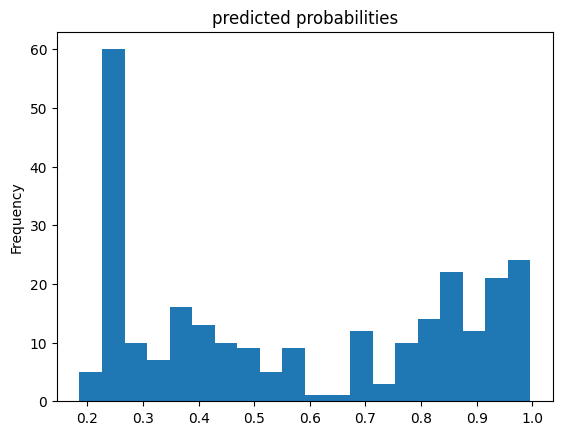

In [84]:
warnings.filterwarnings('ignore')
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
clear_output() 
probs.plot(kind='hist', bins=20, title='predicted probabilities');

# For Classification

In [85]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']  # output label has three categories


In [91]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [92]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [93]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() 

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


### Make input for tensor

In [94]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)


In [97]:
train.keys()

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

In [98]:
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


### Building the model

In [104]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30, 10],
    n_classes=3)
# clear_output()  

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hp\\AppData\\Local\\Temp\\tmprqhf_b8o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [105]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)
# We include a lambda to avoid creating an inner function previously

Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\hp\AppData\Local\Temp\tmprqhf_b8o\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.2395959, step = 0
INFO:tensorflow:global_step/sec: 117.319
INFO:tensorflow:loss = 1.0415196, step = 100 (0.856 sec)
INFO:tensorflow:global_step/sec: 166.226
INFO:tensorflow:loss = 0.9854253, step = 200 (0.602 sec)
INFO:tensorflow:global_step/sec: 188.701
INFO:tensorflow:loss = 0.9384628, step = 300 (0.529 sec)
INFO:tensorflow:global_step/sec: 207.088
INFO:tensorflow:loss = 0.9017071, step = 400 (0.483 sec)
INFO:tensorflow:global_step/s

In [106]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-12-29T13:25:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmprqhf_b8o\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.69723s
INFO:tensorflow:Finished evaluation at 2023-12-29-13:25:54
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.6666667, average_loss = 0.5497325, global_step = 5000, loss = 0.5497325
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\hp\AppData\Local\Temp\tmprqhf_b8o\model.ckpt-5000

Test set accuracy: 0.667



### Prediction 

In [110]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")
        if not val.isdigit():
            valid = False
    predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


Please type numeric values as prompted.
SepalLength: 5.3
SepalWidth: 2.3
PetalLength: 2.1
PetalWidth: 2.0
{'SepalLength': [5.3], 'SepalWidth': [2.3], 'PetalLength': [2.1], 'PetalWidth': [2.0]}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmprqhf_b8o\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (37.5%)


In [125]:
# Here is some example input and expected classes you can try above
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

predictions = classifier.predict(input_fn=lambda: input_fn(predict_x))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    
    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmprqhf_b8o\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (81.7%)
Prediction is "Virginica" (47.0%)
Prediction is "Virginica" (63.5%)


## Hidden Markov Model

In [24]:
# Run in colab

In [25]:
# !pip install tensorflow==2.6.0
# !pip install tensorflow-probability==0.14.1
# !pip install tensorflow_probability==0.14.0
# !pip install --upgrade tensorflow-probability
# !pip install --upgrade tensorflow

In [26]:
# import tensorflow_probability as tfp  
# import tensorflow as tf

In [27]:
# tfd = tfp.distributions  # making a shortcut for later on
# initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
# transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
#                                                  [0.2, 0.8]])  # refer to points 3 and 4 above
# observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

In [28]:
# model = tfd.HiddenMarkovModel(
#     initial_distribution=initial_distribution,
#     transition_distribution=transition_distribution,
#     observation_distribution=observation_distribution,
#     num_steps=7)

In [29]:
# mean = model.mean()

# # due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# # from within a session to see the value of this tensor

# # in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
# with tf.compat.v1.Session() as sess:
#   print(mean.numpy())